In [2]:
import numpy as np
np.random.seed(12345)

# Conditional Expectation and Mean Square Error

In this section, we work through a detailed example using conditional
expectation and optimization methods.  Suppose we have two fair six-sided die
($X$ and $Y$) and we want to measure the sum of the two variables as $Z=X+Y$.
Further, let's suppose that given $Z$, we want the best estimate of $X$ in the
mean-squared-sense. Thus, we want to minimize the following:

$$
J(\alpha) = \sum ( x - \alpha z )^2 \mathbb{P}(x,z)
$$

 where $\mathbb{P}$ is the probability mass function for this problem.
The idea is that when we have solved this problem, we will have a function of
$Z$ that is going to be the minimum MSE  estimate of $X$.  We can substitute in
for $Z$ in $J$ and get:

$$
J(\alpha) = \sum ( x - \alpha (x+y) )^2 \mathbb{P}(x,y)
$$

  Let's work out the steps in Sympy in the following:

In [3]:
import sympy as S
from sympy.stats import density, E, Die

x=Die('D1',6)     # 1st six sided die
y=Die('D2',6)     # 2nd six sides die
a=S.symbols('a')
z = x+y           # sum of 1st and 2nd die
J = E((x-a*(x+y))**2) # expectation
print S.simplify(J)

329*a**2/6 - 329*a/6 + 91/6


 With all that setup we can now use basic calculus to minimize the
objective function $J$,

In [4]:
sol,=S.solve(S.diff(J,a),a) # using calculus to minimize
print sol # solution is 1/2

1/2


**Programming Tip.**

Sympy has a `stats` module that can do some basic work with expressions
involving probability densities and expectations. The above code uses its `E`
function to compute the expectation.



 This says that $z/2$ is the MSE estimate of $X$ given $Z$ which means
geometrically (interpreting the MSE as a squared distance weighted by the
probability mass function) that $z/2$ is as *close* to $x$ as we are going to
get for a given $z$.

Let's look at the same problem using the conditional expectation operator $
\mathbb{E}(\cdot|z) $ and apply it to our definition of $Z$. Then

$$
\mathbb{E}(z|z)=\mathbb{E}(x+y|z)=\mathbb{E}(x|z)+\mathbb{E}(y|z)=z
$$

 using the linearity of the expectation. Now, since by the
symmetry of the problem (i.e., two identical die), we have

$$
\mathbb{E}(x|z)=\mathbb{E}(y|z)
$$

 we can plug this in and solve

$$
2 \mathbb{E}(x|z)=z
$$

 which once again gives,

$$
\mathbb{E}(x|z)  =\frac{z}{2}
$$

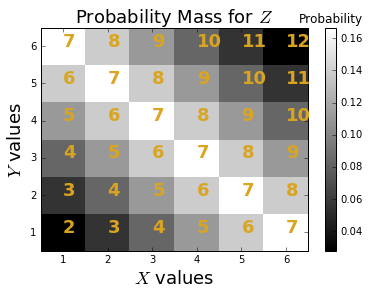

In [5]:
%matplotlib inline

from numpy import arange,array
from matplotlib.pylab import subplots, cm
from sympy import Integer
fig,ax = subplots()
v = arange(1,7) + arange(1,7)[:,None]
foo=lambda i: density(z)[Integer(i)].evalf() # some tweaks to get a float out
Zmass=array(map(foo,v.flat),dtype=float).reshape(6,6)

pc=ax.pcolor(arange(1,8),arange(1,8),Zmass,cmap=cm.gray)
_=ax.set_xticks([(i+0.5) for i in range(1,7)])
_=ax.set_xticklabels([str(i) for i in range(1,7)])
_=ax.set_yticks([(i+0.5) for i in range(1,7)])
_=ax.set_yticklabels([str(i) for i in range(1,7)])
for i in range(1,7):
    for j in range(1,7):
        _=ax.text(i+.5,j+.5,str(i+j),fontsize=18,fontweight='bold',color='goldenrod')

_=ax.set_title(r'Probability Mass for $Z$',fontsize=18)    
_=ax.set_xlabel('$X$ values',fontsize=18)
_=ax.set_ylabel('$Y$ values',fontsize=18);
cb=fig.colorbar(pc)
_=cb.ax.set_title(r'Probability',fontsize=12)
#fig.savefig('fig-probability/Conditional_expectation_MSE_001.png')

<!-- dom:FIGURE: [fig-probability/Conditional_expectation_MSE_001.png, width=500 frac=0.85] The values of $Z$ are in yellow with the corresponding values for $X$ and $Y$ on the axes. The gray scale colors indicate the underlying joint probability density. <div id="fig:Conditional_expectation_MSE_001"></div> -->
<!-- begin figure -->
<div id="fig:Conditional_expectation_MSE_001"></div>

<p>The values of $Z$ are in yellow with the corresponding values for $X$ and $Y$ on the axes. The gray scale colors indicate the underlying joint probability density.</p>
<img src="fig-probability/Conditional_expectation_MSE_001.png" width=500>

<!-- end figure -->


 which is equal to the estimate we just found by minimizing the MSE.
Let's explore this further with [Figure](#fig:Conditional_expectation_MSE_001).  [Figure](#fig:Conditional_expectation_MSE_001) shows the values of $Z$ in yellow with
the corresponding values for $X$ and $Y$ on the axes.  Suppose $z=2$, then the
closest $X$ to this is $X=1$, which is what $\mathbb{E}(x|z)=z/2=1$ gives. What
happens when $Z=7$? In this case, this value is spread out diagonally along the
$X$ axis so if $X=1$, then $Z$ is 6 units away, if $X=2$, then $Z$ is 5 units
away and so on.

Now, back to the original question, if we had $Z=7$ and we wanted
to get as close as we could to this using $X$, then why not choose
$X=6$ which is only one unit away from $Z$? The problem with doing
that is $X=6$ only occurs 1/6 of the time, so we are not likely to
get it right the other 5/6 of the time. So, 1/6 of the time we are
one unit away but 5/6 of the time we are much more than one unit
away. This means that the MSE score is going to be worse. Since
each value of $X$ from 1 to 6 is equally likely, to play it safe,
we choose $7/2$ as the estimate, which is what the conditional
expectation suggests.

We can check this claim with samples using Sympy below:

In [6]:
import numpy as np
from sympy import stats
# Eq constrains Z
samples_z7 = lambda : stats.sample(x, S.Eq(z,7)) 
#using 6 as an estimate
mn= np.mean([(6-samples_z7())**2 for i in range(100)]) 
#7/2 is the MSE estimate
mn0= np.mean([(7/2.-samples_z7())**2 for i in range(100)]) 
print 'MSE=%3.2f using 6 vs MSE=%3.2f using 7/2 ' % (mn,mn0)

MSE=8.57 using 6 vs MSE=3.01 using 7/2 


**Programming Tip.**

The `stats.sample(x, S.Eq(z,7))` function call samples the `x` variable subject
to a condition on the `z` variable. In other words, it generates random samples
of `x` die, given that the sum of the outcomes of that die and the `y` die add
up to `z==7`.



 Please run the above code repeatedly in the Jupyter/IPython
Notebook corresponding to this section until you have convinced
yourself  that the $\mathbb{E}(x|z)$ gives the lower MSE every
time.  To push this reasoning, let's consider the case where the
die is so biased so that the outcome of `6` is ten times more
probable than any of the other outcomes. That is,

$$
\mathbb{P}(6) = 2/3
$$

 whereas $\mathbb{P}(1)=\mathbb{P}(2)=\ldots=\mathbb{P}(5)=1/15$.
We can explore this using Sympy as in the following:

In [7]:
# here 6 is ten times more probable than any other outcome
x=stats.FiniteRV('D3',{1:1/15., 2:1/15., 
                       3:1/15., 4:1/15.,
                       5:1/15., 6:2/3.})

 As before, we construct the sum of the two dice, and plot the
corresponding probability mass function in [Figure](#fig:Conditional_expectation_MSE_002).  As compared with [Figure](#fig:Conditional_expectation_MSE_001), the probability mass has been shifted
away from the smaller numbers.

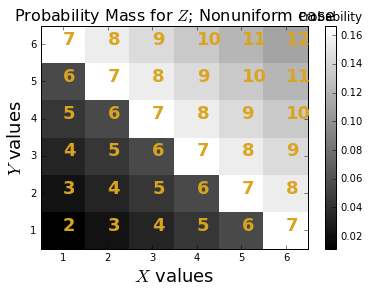

In [8]:
z = x + y
foo=lambda i: density(z)[S.Integer(i)].evalf() # some tweaks to get a float out
v = np.arange(1,7) + np.arange(1,7)[:,None]
Zmass=np.array(map(foo,v.flat),dtype=float).reshape(6,6)

from matplotlib.pylab import subplots, cm
fig,ax=subplots()
pc=ax.pcolor(np.arange(1,8),np.arange(1,8),Zmass,cmap=cm.gray)
_=ax.set_xticks([(i+0.5) for i in range(1,7)])
_=ax.set_xticklabels([str(i) for i in range(1,7)])
_=ax.set_yticks([(i+0.5) for i in range(1,7)])
_=ax.set_yticklabels([str(i) for i in range(1,7)])
for i in range(1,7):
    for j in range(1,7):
        _=ax.text(i+.5,j+.5,str(i+j),fontsize=18,fontweight='bold',color='goldenrod')

_=ax.set_title(r'Probability Mass for $Z$; Nonuniform case',fontsize=16)    
_=ax.set_xlabel('$X$ values',fontsize=18)
_=ax.set_ylabel('$Y$ values',fontsize=18);
cb=fig.colorbar(pc)
_=cb.ax.set_title(r'Probability',fontsize=12)
#fig.savefig('fig-probability/Conditional_expectation_MSE_002.png')

<!-- dom:FIGURE: [fig-probability/Conditional_expectation_MSE_002.png, width=500 frac=0.85] The values of $Z$ are in yellow with the corresponding values for $X$ and $Y$ on the axes.  <div id="fig:Conditional_expectation_MSE_002"></div> -->
<!-- begin figure -->
<div id="fig:Conditional_expectation_MSE_002"></div>

<p>The values of $Z$ are in yellow with the corresponding values for $X$ and $Y$ on the axes.</p>
<img src="fig-probability/Conditional_expectation_MSE_002.png" width=500>

<!-- end figure -->


Let's see what the conditional expectation says about how we can estimate $X$
from $Z$.

In [9]:
E(x, S.Eq(z,7)) # conditional expectation E(x|z=7)

5.00000000000000

  Now that we have $\mathbb{E}(x|z=7) = 5$, we can generate
samples as before and see if this gives the minimum MSE.

In [14]:
samples_z7 = lambda : stats.sample(x, S.Eq(z,7)) 
#using 6 as an estimate
mn= np.mean([(6-samples_z7())**2 for i in range(100)]) 
#5 is the MSE estimate
mn0= np.mean([(5-samples_z7())**2 for i in range(100)]) 
print 'MSE=%3.2f using 6 vs MSE=%3.2f using 5 ' % (mn,mn0)

MSE=4.67 using 6 vs MSE=2.71 using 5 


Using a simple example, we have emphasized the connection between minimum mean
squared error problems and conditional expectation. Hopefully, the last two
figures helped expose the role of the probability density.  Next, we'll
continue revealing  the true power of the conditional expectation as we
continue to develop corresponding geometric intuition.